# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of train data for which the output labels are known.

```
|---------------------------------------------------|
| n= 275       | Prediction (NO) | Predection (YES) |
| --------------------------------------------------|-----
| Actual (NO)  | (TN) 60         | (FP)   10        | 70
| --------------------------------------------------|-----
| Actual (YES) | (FN)  5         | (TP)  200        |
| --------------------------------------------------|
               |      65         |       210
```            

If we are predicting iceberg then "YES" would mean they are iceberg and "NO" would mean they are ships.

```
- Two possible predicted classes: "YES" and "NO". 
- Total images tested        : 275
- Classifier predicted "YES" : 210
- Classifier predicted "NO"  :  65
- Actual Icebergs            : 205
- Actual Ships               : 70
```

#### Terms
- True positives  (TP): Predicted "YES" and Actual is also "YES".
- True negatives  (TN): Predicted "NO" and Actual is also "NO".
- False positives (FP): Predicted "YES" and Actual is "NO" ("Type I error").
- False negatives (FN): Predicted "NO" and Actual is "YES"("Type II error").



- Accuracy: Overall, how often is the classifier correct?
        (TP+TN)/total = (200+60)/275 = 0.91
- Misclassification Rate: Overall, how often is it wrong?
        (FP+FN)/total = (10+5)/165 = 0.09
        equivalent to 1 minus Accuracy
        also known as "Error Rate"
- True Positive Rate: When it's actually yes, how often does it predict yes?
        TP/actual yes = 200/105 = 0.95
        also known as "Sensitivity" or "Recall"
- False Positive Rate: When it's actually no, how often does it predict yes?
        FP/actual no = 10/60 = 0.17
    Specificity: When it's actually no, how often does it predict no?
        TN/actual no = 50/60 = 0.83
        equivalent to 1 minus False Positive Rate
    Precision: When it predicts yes, how often is it correct?
        TP/predicted yes = 100/110 = 0.91
    Prevalence: How often does the yes condition actually occur in our sample?
        actual yes/total = 105/165 = 0.64




In [1]:
import sys

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
import pandas as pd 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
test = pd.read_json('../data/test.json')
#df_test.inc_angle = df_test.inc_angle.replace('na',0)

In [2]:
train = pd.read_json('../data/train.json') # this is a dataframe

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
#print(X)
#print(y)


In [7]:

class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [5]:
#X = train['band_1']
#Y = train['is_iceberg']
XX = np.array(train['band_1'])
yy = np.array(train['is_iceberg'])

In [21]:
x_band1 = np.array([np.array(np.mean(band)).astype(np.float32) for band in train["band_1"]])
#print(x_band1)

x_band2 = np.array([np.array(np.mean(band)).astype(np.float32) for band in train["band_2"]])
#print(x_band2)

#data = np.column_stack((x_band1,x_band2,train['inc_angle'],train['is_iceberg']))
#print(data)
data = np.column_stack((x_band1,x_band2))
#print(data)

#X = XX
#y = yy
print(XX.shape)
print(yy.shape)
#print(X)
#print(y)
#print(yy)
#print(XX)
X = data # we only take the first two features. We could
X = X[0:1700:]
 # avoid this ugly slicing by using a two-dim dataset
y = np.array(train['is_iceberg'])
y = y[0:1700:]
print("Dta")
print(X.shape)
print(y.shape)


(1604,)
(1604,)
Dta
(1604, 2)
(1604,)


In [22]:
class_names = ['ship' , 'iceberg']
print(class_names)

['ship', 'iceberg']


(401, 2)
(401,)
Confusion matrix, without normalization
[[105  95]
 [ 79 122]]
Normalized confusion matrix
[[ 0.53  0.47]
 [ 0.39  0.61]]


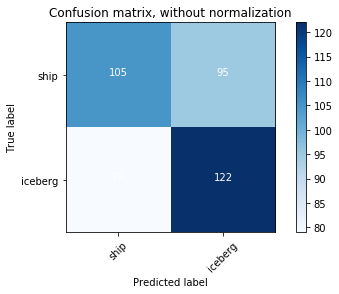

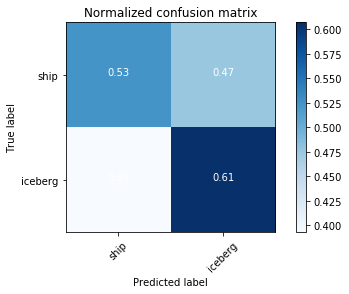

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#class_names = iris.target_names
class_names = ['ship', 'iceberg']


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_test.shape)
print(y_test.shape)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


In [ ]:

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Band 1 and 2')
plt.ylabel('Ship or Iceberg')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()